## Torch Library loading ##

In [28]:
import torch
import torch.nn as nn
import torch.nn . functional as F
import torchvision
import torchvision . transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
import math
from torch.autograd import variable
from torchvision.utils import make_grid
import os 
from torchsummary import summary


# Device configuration #

In [2]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Hyper-parameters #

In [3]:

num_epochs =15
batch_size = 32
learning_rate = 0.01


# Data loading and downloading #

In [4]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
 [transforms.ToTensor()
 ])
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
 download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
 download=True, transform=transform)
TRAIN_SPLIT=0.9
VAL_SPLIT=0.1
numTrainSamples = int(len(train_dataset) * TRAIN_SPLIT)
numValSamples = int(len(train_dataset) * VAL_SPLIT)
(trainData, valData) = random_split(train_dataset,
[numTrainSamples, numValSamples],
generator=torch.Generator().manual_seed(42))
train_loader = torch.utils.data.DataLoader(trainData, batch_size=batch_size,
 shuffle=True)
validation_loader=torch.utils.data.DataLoader(valData, batch_size=batch_size,
 shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

# imshow() #

In [5]:
classes = ('0', '1', '2', '3',
 '4', '5', '6', '7', '8', '9')
def imshow(img):
 img = img / 2 + 0.5 # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()

# 1     MNIST classification using CNN

In [6]:
class CNN(nn.Module):
     def __init__(self):
         super(CNN, self).__init__()
         self.conv1 = nn.Conv2d(1,32,kernel_size = 3, stride = 1, padding = 1)
         self.conv2 = nn.Conv2d(32,32,kernel_size = 3, stride = 1, padding = 1)
         self.fc1 = nn.Linear(7*7*32, 500)
         self.fc2 = nn.Linear(500, 10)
         self.activ = nn.ReLU()
     def pool(self, x, kernel_size = 2, stride = 2):
         out = F.max_pool2d(x, kernel_size, stride)
         return out
     def forward(self, x, softmax = True):
         out = self.activ(self.conv1(x))
         out = self.pool(out)
         out = self.activ(self.conv2(out))
         out = self.pool(out)
         out = out.reshape(out.size(0),-1)
         out = self.activ(self.fc1(out))
         out = self.fc2(out)
         if softmax:
             return F.softmax(out, dim = 1)
         else:
             return out

In [7]:
CNN().forward

<bound method CNN.forward of CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (activ): ReLU()
)>

# Training Error ,Valdation error plots for every epoch and average prediction accuracy

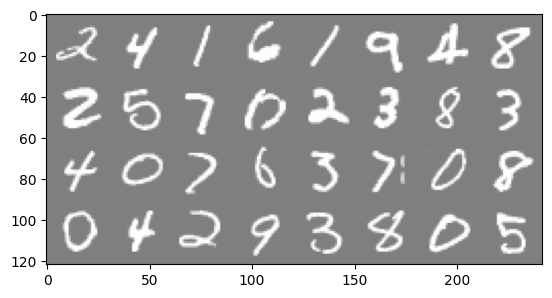

Epoch [1/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 11.296875 %
Epoch [1/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 11.5 %
Epoch [1/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 11.3125 %
Epoch [1/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 11.171875 %
Epoch [1/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.9875 %
Epoch [1/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.861979166666666 %
Epoch [1/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.712053571428571 %
Epoch [1/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.6171875 %


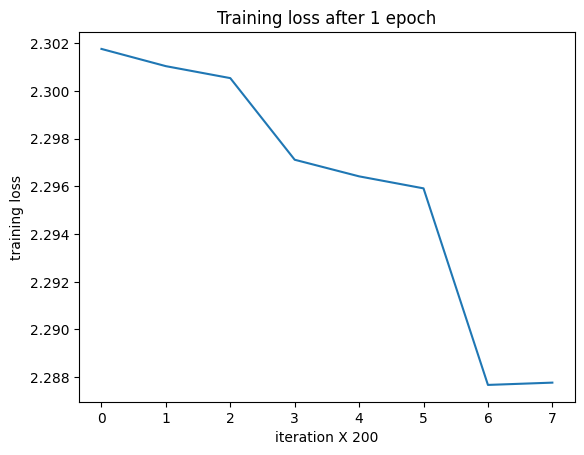

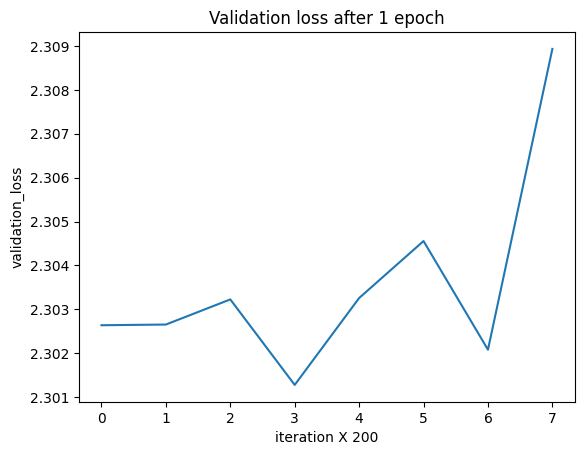

Epoch [2/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.540254237288135 %
Epoch [2/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.498982279693486 %
Epoch [2/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.494973776223777 %
Epoch [2/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.480305466237942 %
Epoch [2/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.493396577380953 %
Epoch [2/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.496018005540167 %
Epoch [2/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.427461139896373 %
Epoch [2/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.369145377128953 %


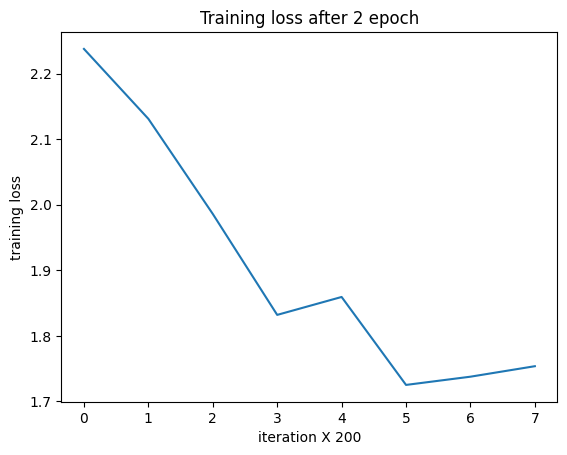

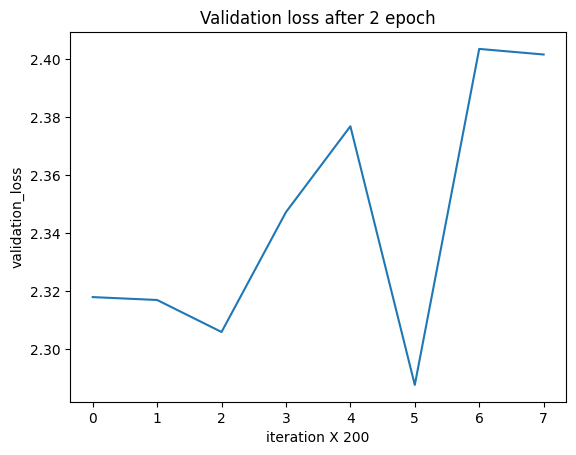

Epoch [3/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.350251677852349 %
Epoch [3/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.32176906779661 %
Epoch [3/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.296151911468813 %
Epoch [3/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.283465038314176 %
Epoch [3/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.296218007312614 %
Epoch [3/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.282588505244755 %
Epoch [3/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.266828936348409 %
Epoch [3/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.231611736334406 %


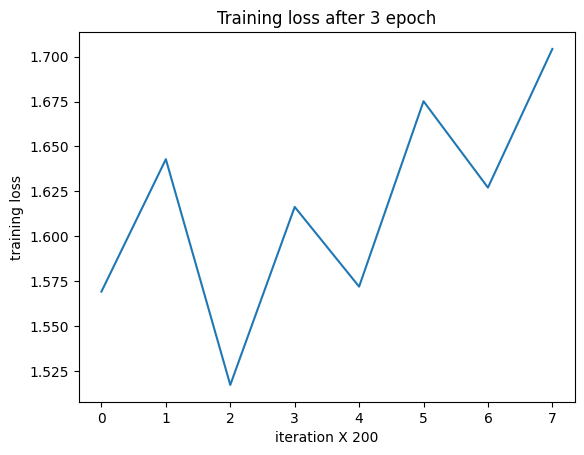

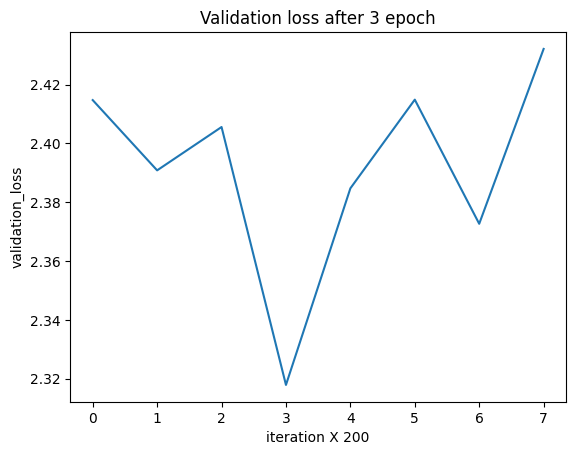

Epoch [4/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.231644186930092 %
Epoch [4/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.22373718887262 %
Epoch [4/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.21528513418079 %
Epoch [4/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.222864085948158 %
Epoch [4/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.214483014511874 %
Epoch [4/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.199153895274584 %
Epoch [4/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.206045018564357 %
Epoch [4/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.20267481992797 %


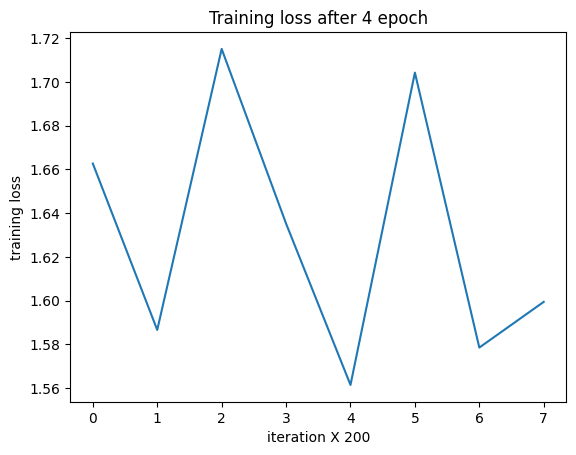

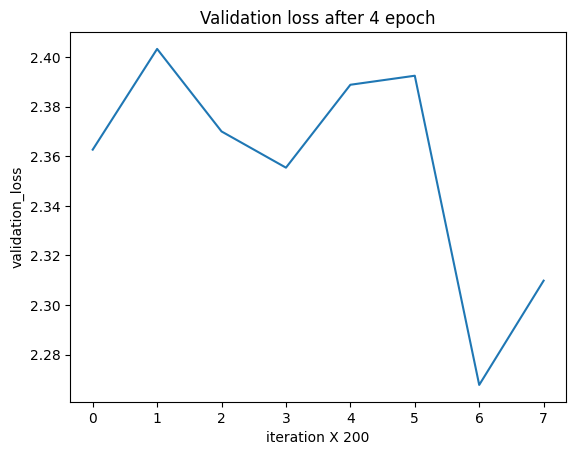

Epoch [5/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.190862341772151 %
Epoch [5/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.185525027964205 %
Epoch [5/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.194079842219804 %
Epoch [5/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.184388241525424 %
Epoch [5/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.177212332301341 %
Epoch [5/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.181400905432596 %
Epoch [5/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.168133586849853 %
Epoch [5/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.168223180076629 %


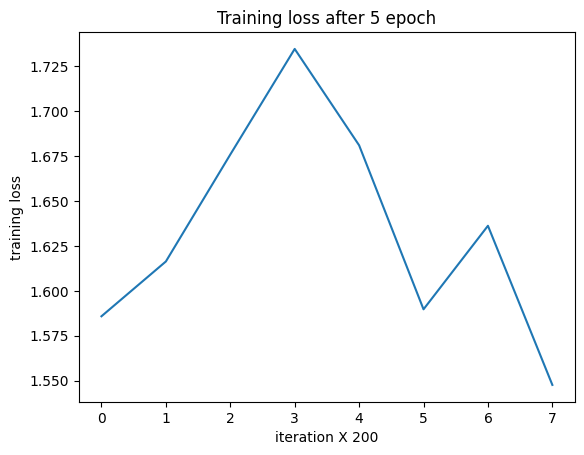

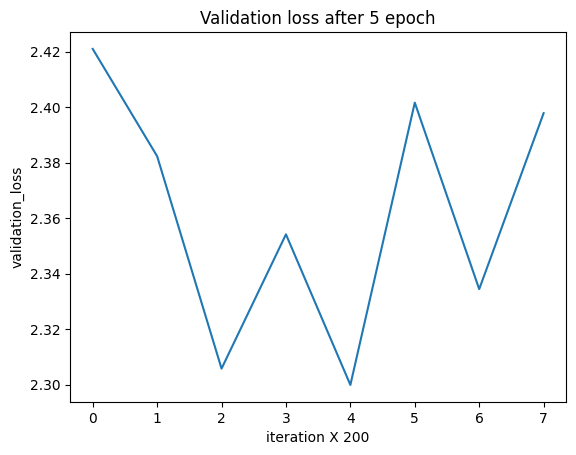

Epoch [6/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.182653356481481 %
Epoch [6/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.17993495475113 %
Epoch [6/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.17491703539823 %
Epoch [6/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.182291666666666 %
Epoch [6/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.178760593220339 %
Epoch [6/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.177969398340249 %
Epoch [6/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.168953252032521 %
Epoch [6/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.159673804780876 %


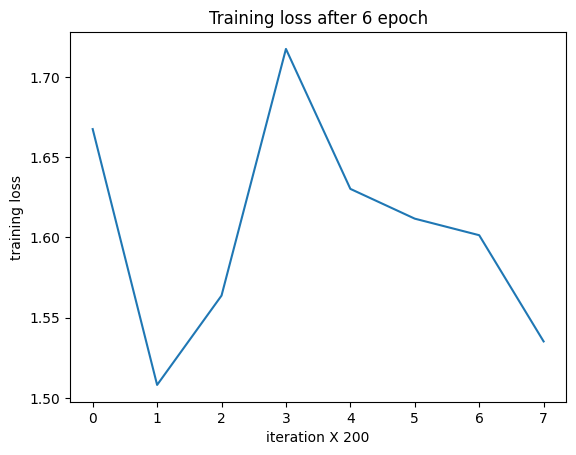

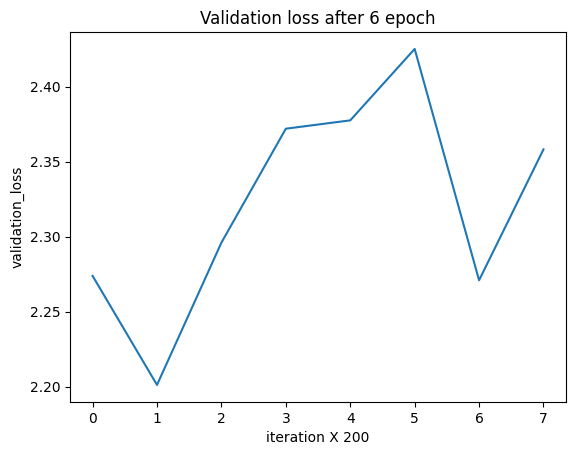

Epoch [7/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.153829395817196 %
Epoch [7/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.162780205167174 %
Epoch [7/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.157997762863534 %
Epoch [7/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.158537701317716 %
Epoch [7/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.142489665708124 %
Epoch [7/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.14990510240113 %
Epoch [7/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.164924531575295 %
Epoch [7/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.161046214188268 %


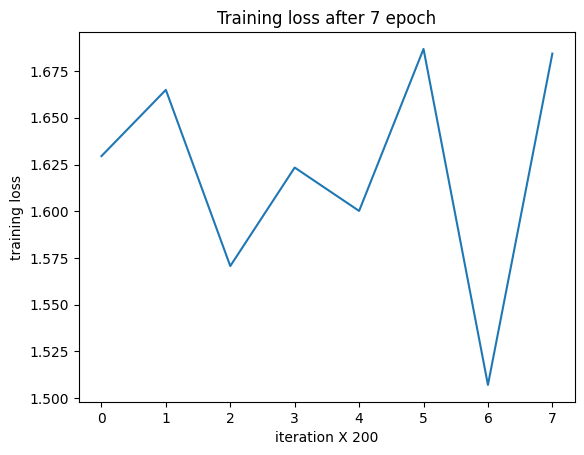

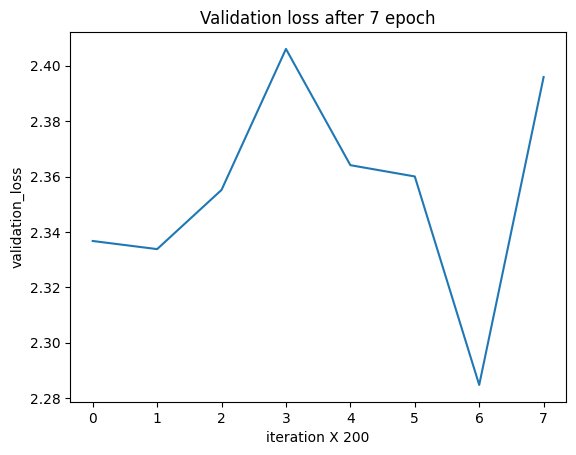

Epoch [8/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.162751747669773 %
Epoch [8/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.157017436149312 %
Epoch [8/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.146685728092784 %
Epoch [8/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.142131024096386 %
Epoch [8/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.13771847690387 %
Epoch [8/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.143045098340504 %
Epoch [8/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.136624167675544 %
Epoch [8/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.134820363744783 %


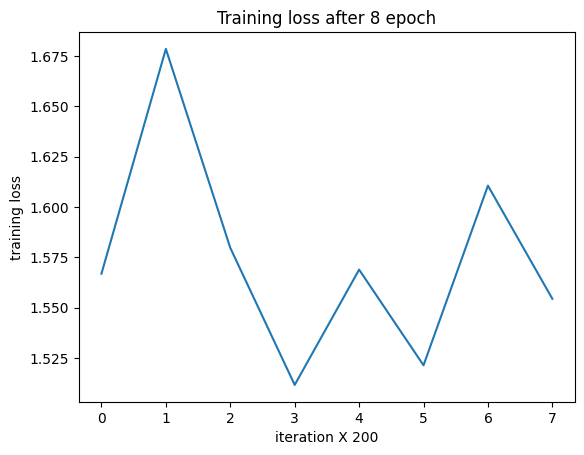

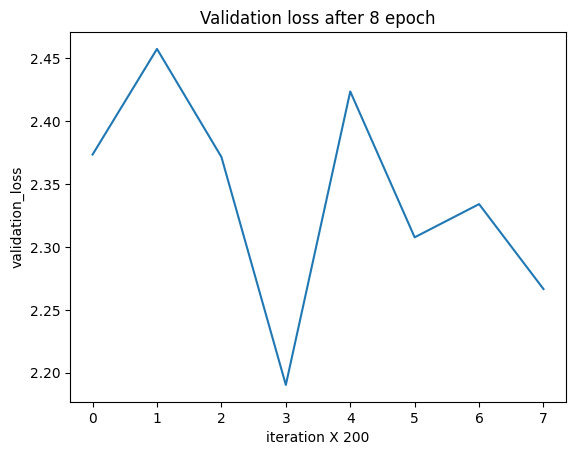

Epoch [9/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.129113762405137 %
Epoch [9/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.12253668009206 %
Epoch [9/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.128997093023257 %
Epoch [9/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.139864723154362 %
Epoch [9/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.147200772200772 %
Epoch [9/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.151786928726876 %
Epoch [9/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.152266170155663 %
Epoch [9/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.15769829184322 %


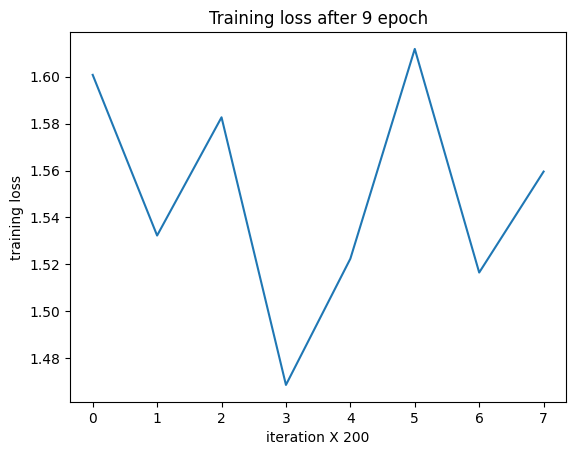

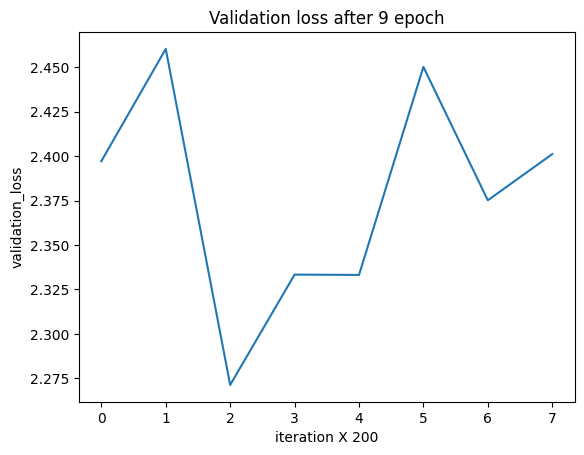

Epoch [10/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.15462577962578 %
Epoch [10/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.140416559774243 %
Epoch [10/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.140814969604863 %
Epoch [10/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.146674899949975 %
Epoch [10/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.145249197134387 %
Epoch [10/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.139282881893607 %
Epoch [10/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.139487403567985 %
Epoch [10/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.13410403763697 %


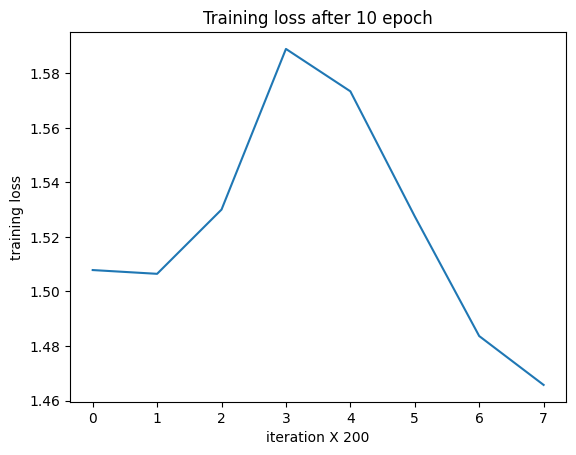

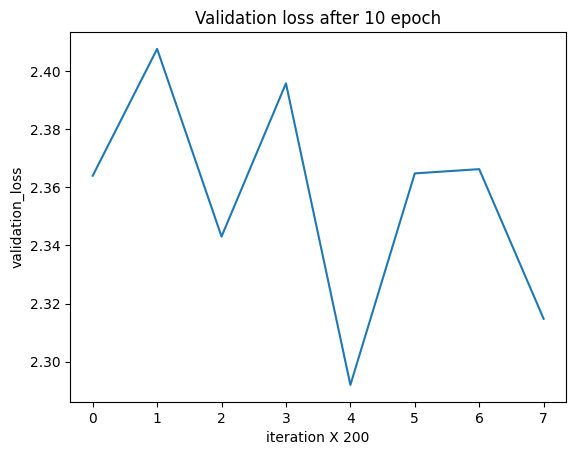

Epoch [11/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.133379683840749 %
Epoch [11/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.13744212962963 %
Epoch [11/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.136763443935926 %
Epoch [11/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.140342194570136 %
Epoch [11/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.145938199105146 %
Epoch [11/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.145188053097344 %
Epoch [11/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.13898386214442 %
Epoch [11/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.13189935064935 %


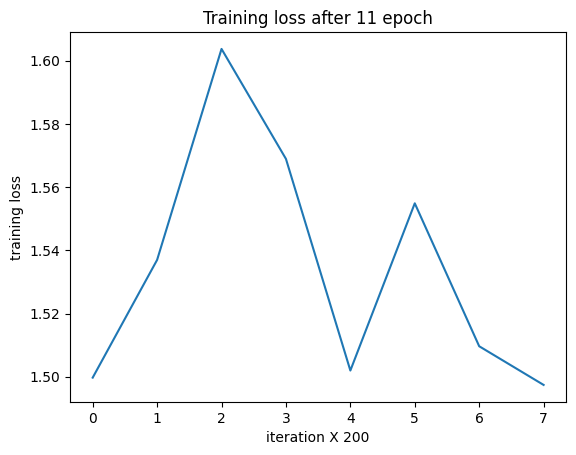

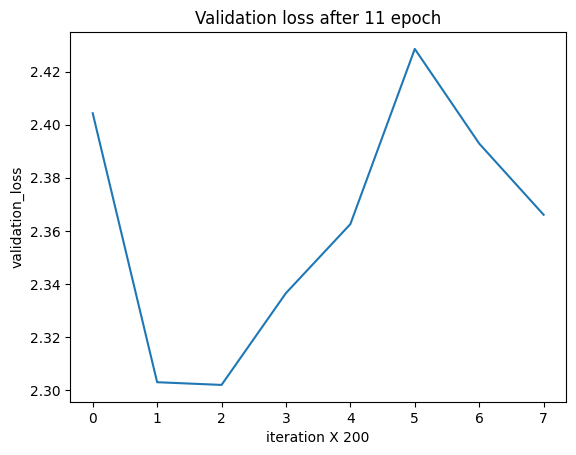

Epoch [12/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.132106511082695 %
Epoch [12/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.131537326022775 %
Epoch [12/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.129675761686144 %
Epoch [12/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.126884551838083 %
Epoch [12/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.122074304987734 %
Epoch [12/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.121471570214489 %
Epoch [12/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.118846404246796 %
Epoch [12/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.11441392304641 %


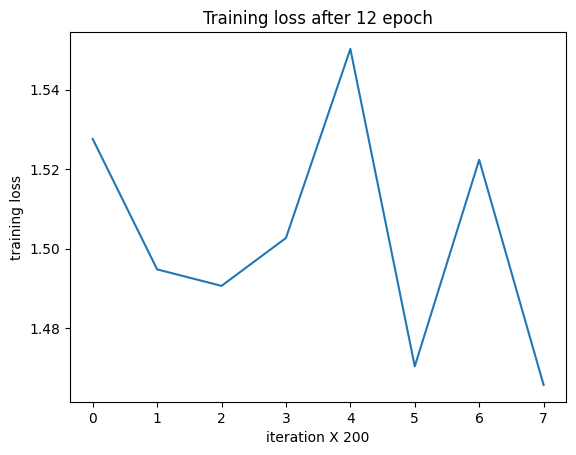

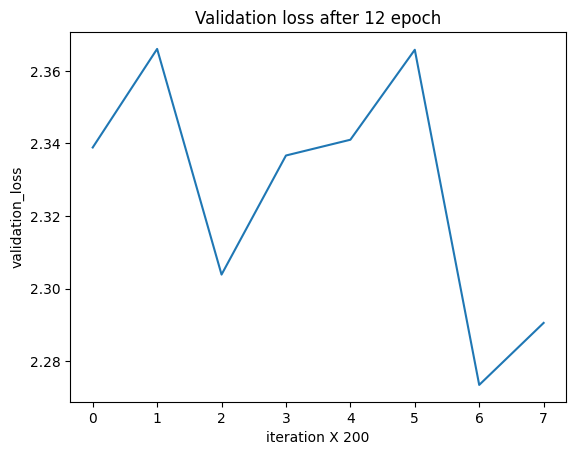

Epoch [13/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.108892256550645 %
Epoch [13/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.109048218435321 %
Epoch [13/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.095566024165707 %
Epoch [13/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.093767809650457 %
Epoch [13/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.095972901768912 %
Epoch [13/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.097699944071588 %
Epoch [13/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.096653352419652 %
Epoch [13/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.097198709736457 %


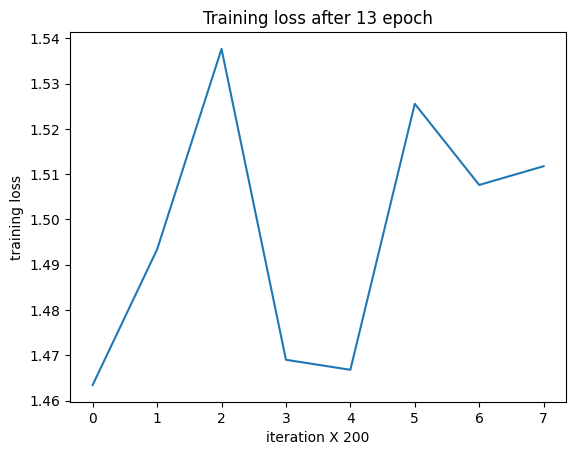

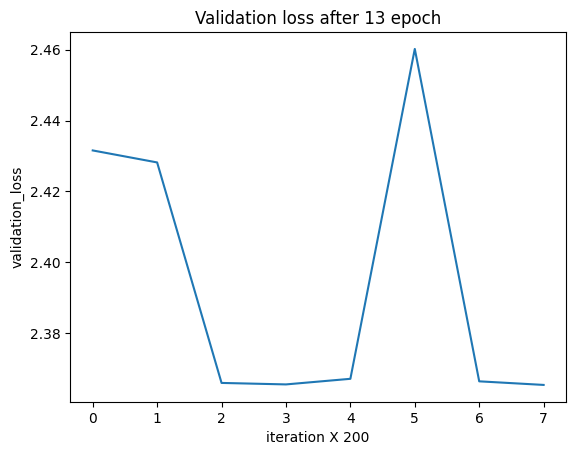

Epoch [14/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.095285404624278 %
Epoch [14/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.094572368421053 %
Epoch [14/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.087356946415898 %
Epoch [14/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.085626978543791 %
Epoch [14/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.088966614365411 %
Epoch [14/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.088872926028344 %
Epoch [14/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.084095484921178 %
Epoch [14/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.08245200475705 %


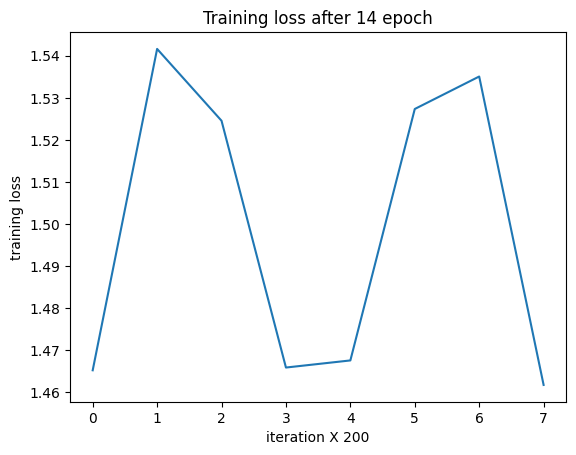

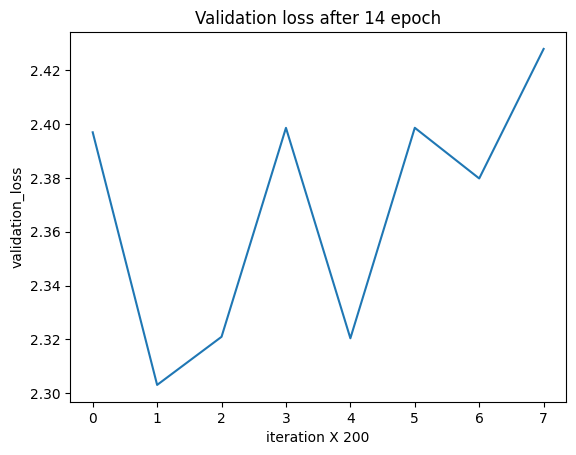

Epoch [15/15], Step [200/1688], Los:loss
 Validation Accuracy of the network: 10.08308157099698 %
Epoch [15/15], Step [400/1688], Los:loss
 Validation Accuracy of the network: 10.081739971704394 %
Epoch [15/15], Step [600/1688], Los:loss
 Validation Accuracy of the network: 10.086739641795972 %
Epoch [15/15], Step [800/1688], Los:loss
 Validation Accuracy of the network: 10.090762115258677 %
Epoch [15/15], Step [1000/1688], Los:loss
 Validation Accuracy of the network: 10.088629628126014 %
Epoch [15/15], Step [1200/1688], Los:loss
 Validation Accuracy of the network: 10.08728656572165 %
Epoch [15/15], Step [1400/1688], Los:loss
 Validation Accuracy of the network: 10.087088526685843 %
Epoch [15/15], Step [1600/1688], Los:loss
 Validation Accuracy of the network: 10.087884432466709 %


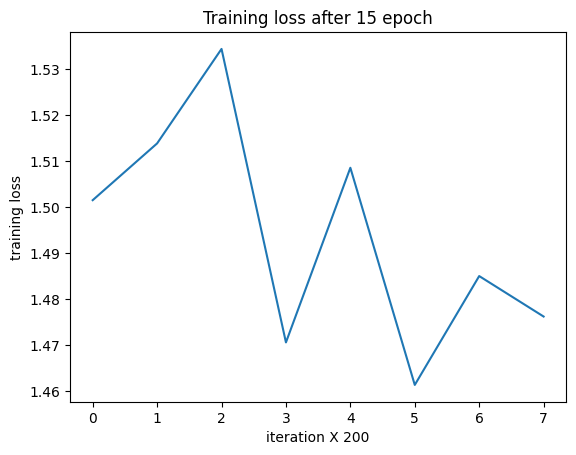

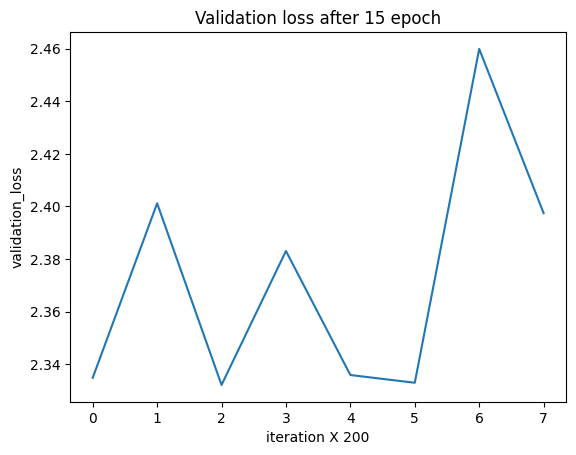

Finished Training


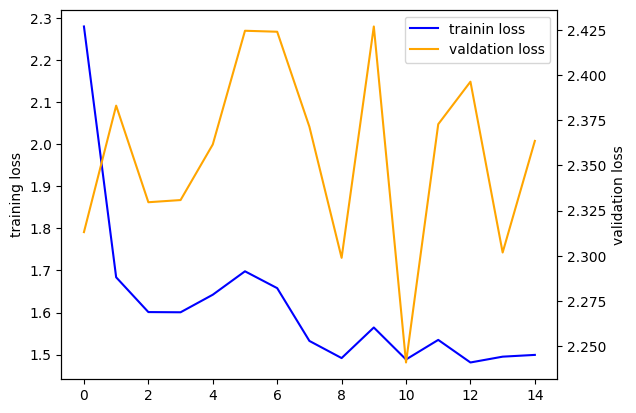

In [8]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)
training_loss=[]
validation_loss=[]
n_correct = 0
n_samples = 0
n_class_correct = [0 for i in range(10)]
n_class_samples = [0 for i in range(10)]
train_loss_epoch=[]
validation_loss_epoch=[]
num_iter=int(math.ceil(len(trainData)/batch_size))
for epoch in range(num_epochs):
        training_loss=[]
        validation_loss=[]
        for i in range(num_iter):
             images,labels=next(iter(train_loader))
             images_val,labels_val=next(iter(validation_loader))
             
             images = images.to(device)
             labels = labels.to(device)
             images_val=images_val.to(device)
             labels_val=labels_val.to(device)
             # Forward pass
             outputs = model(images)
             outputs_val=model(images_val)
             loss = criterion(outputs, labels)
             
             loss_val=criterion(outputs_val,labels)
             # Backward and optimize
             optimizer.zero_grad()
             loss.backward()
             optimizer.step()
             train_loss=loss.cpu().detach().numpy()
             val_loss=loss_val.cpu().detach().numpy()
             
             
             _, predicted = torch.max(outputs_val, 1)
             n_samples += labels.size(0)
             n_correct += (predicted == labels).sum().item()
             batch_size_list=list(labels.size())
             batch_size=batch_size_list[0]
             for j in range(batch_size):
                     label = labels[j]
                     pred = predicted[j]
                     if (label == pred):
                         n_class_correct[label] += 1
                     n_class_samples[label] += 1
             acc = 100.0 * n_correct / n_samples
             if (i+1) % 200 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Los:loss')
                print(f' Validation Accuracy of the network: {acc} %')
                training_loss.append(train_loss)
                validation_loss.append(val_loss)
        plt.plot(range(len(training_loss)),training_loss)
        plt.xlabel("iteration X 200")
        plt.ylabel("training loss")
        plt.title(f'Training loss after {epoch+1} epoch')
        plt.show()
        plt.plot(range(len(validation_loss)),validation_loss)
        plt.xlabel("iteration X 200")
        plt.ylabel("validation_loss")
        plt.title(f'Validation loss after {epoch+1} epoch')
        plt.show()
        train_loss_epoch.append(train_loss)
        validation_loss_epoch.append(val_loss)
fig,ax1=plt.subplots()
ax2=ax1.twinx()
line1=ax1.plot(range(len(train_loss_epoch)),train_loss_epoch,color="blue",label="trainin loss")
ax1.set_ylabel("training loss")
line2=ax2.plot(range(len(train_loss_epoch)),validation_loss_epoch,color="orange",label="valdation loss")
ax2.set_ylabel("validation loss") 
lines=line1+line2
labels=[l.get_label() for l in lines]
ax1.legend(lines,labels)
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


In [9]:
with torch.no_grad():
         n_correct = 0
         n_samples = 0
         n_class_correct = [0 for i in range(10)]
         n_class_samples = [0 for i in range(10)]
         for images, labels in test_loader:
                 images = images.to(device)
                 labels = labels.to(device)
                 outputs = model(images)
                 # max returns (value ,index)
                 _, predicted = torch.max(outputs, 1)
                 n_samples += labels.size(0)
                 n_correct += (predicted == labels).sum().item()
                 batch_size_list=list(labels.size())
                 batch_size=batch_size_list[0]
                 
                 for i in range(batch_size):
                     label = labels[i]
                     pred = predicted[i]
                     if (label == pred):
                         n_class_correct[label] += 1
                     n_class_samples[label] += 1
         acc = 100.0 * n_correct / n_samples
         print(f'Accuracy of the network: {acc} %')
         for i in range(10):
             acc = 100.0 * n_class_correct[i] / n_class_samples[i]
             print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 97.22 %
Accuracy of 0: 99.28571428571429 %
Accuracy of 1: 98.94273127753304 %
Accuracy of 2: 95.25193798449612 %
Accuracy of 3: 98.41584158415841 %
Accuracy of 4: 99.18533604887983 %
Accuracy of 5: 96.63677130044843 %
Accuracy of 6: 97.28601252609603 %
Accuracy of 7: 97.37354085603113 %
Accuracy of 8: 95.17453798767967 %
Accuracy of 9: 94.44995044598612 %


# Dimensons of the input and output at each layer
output of the filter with kernalsize = K X K ,stride = S,padding = P for input imagesize = W X W  is given by 
$ floor(\frac{(W - K + 2P )}{S} + 1 )$ X $ floor(\frac{(W - K + 2P )}{S} + 1 )$
* input MNIST data dimension is 28 * 28 
* so for a batch size of 32 the input dimension for the conv1 layer is  28 X 28 X 32
* conv-1 layer contains the 32 filters with kernalsize = 3X3,stride = 1 ,zero padding = 1 so output size is 28X28X32
* input is 28X28X32 ,for 2X2 maxpool with stride = 2 has output size of 14X14X32
* input is 14X14X32 ,for conv-2 layer contains the 32 filters with kernalsize = 3X3,stride = 1 ,zero padding = 1 so output size is 14X14X32
* input is 14X14X32,for 2X2 maxpool with stride = 2 has output size of 7X7X32
* after flatting the outputsize is 7X7X32 = 1568
* input is 1568 and output after FC1 is 500
* input is 500 and output after FC2 is 10

  

In [23]:
CNN().forward

<bound method CNN.forward of CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (activ): ReLU()
)>

# Total number of parameters 

In [31]:
summary(CNN(),input_size=(1, 28, 28),device = 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 32, 14, 14]           9,248
              ReLU-4           [-1, 32, 14, 14]               0
            Linear-5                  [-1, 500]         784,500
              ReLU-6                  [-1, 500]               0
            Linear-7                   [-1, 10]           5,010
Total params: 799,078
Trainable params: 799,078
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.49
Params size (MB): 3.05
Estimated Total Size (MB): 3.54
----------------------------------------------------------------


# NO of parameters in conv and FC layers 
* by refering the top of table:
* total no of parametrs in convolution layers = 320 + 9,248 = 9,568 (<2% parameters are in convolution layers)
* total no of parametrs in fully connected layers = 7,84,500 + 5,010 = 7,89,510 ( almost 98% parameters are contained in fully conected layers)10=2078+10=2078

# NO of Nuerons 
1) The number of neurons in i/p are 28 X 28 =784
2) The number of neurons after conv1 layer are 32 X 28 X 28 = 25088
3) The number of neurons after maxpool layer are 32 X 14 X 14 =6272
4) The number of neurons after conv2 layer are 32 X 14 X 14=6272
5) The number of neurons after maxpool 2 layer are 32 X 7 X 7= 1568
6)The number of neurons after FC1 layer are 500
7) The number of neurons after FC 2 layer are 10
* The number of neurons in Convolutional layer are 784+25088+6272+6272=38416
* The number of neurons in FC layers are 1568+500+10=2078


# Batch Normalization 
* I have seen that Batch normalization leads to faster convergence and increased accuracy

# Visualization of Conv layers 
* please refer this article visulization reference:
* https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch

In [11]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
model_children=list(model.children())


In [12]:
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
     if type(model_children[i]) == nn.Conv2d:
         counter += 1
         model_weights.append(model_children[i].weight)
         conv_layers.append(model_children[i])
     elif type(model_children[i]) == nn.Sequential:
         for j in range(len(model_children[i])):
             for child in model_children[i][j].children():
 
                 if type(child) == nn.Conv2d:
                     counter += 1
                     model_weights.append(child.weight)
                     conv_layers.append(child)
print(f"Total convolutional layers: {counter}")


Total convolutional layers: 2


In [13]:
for weight, conv in zip(model_weights, conv_layers):
 # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
     print(f"CONV: {conv} ====> SHAPE: {weight.shape}")


CONV: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 1, 3, 3])
CONV: Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 32, 3, 3])


# 2 . Visualizing the CNN 



# Conv-1 layer


* by seeing those patterens these are simply searching for the edges and various patterens across the images


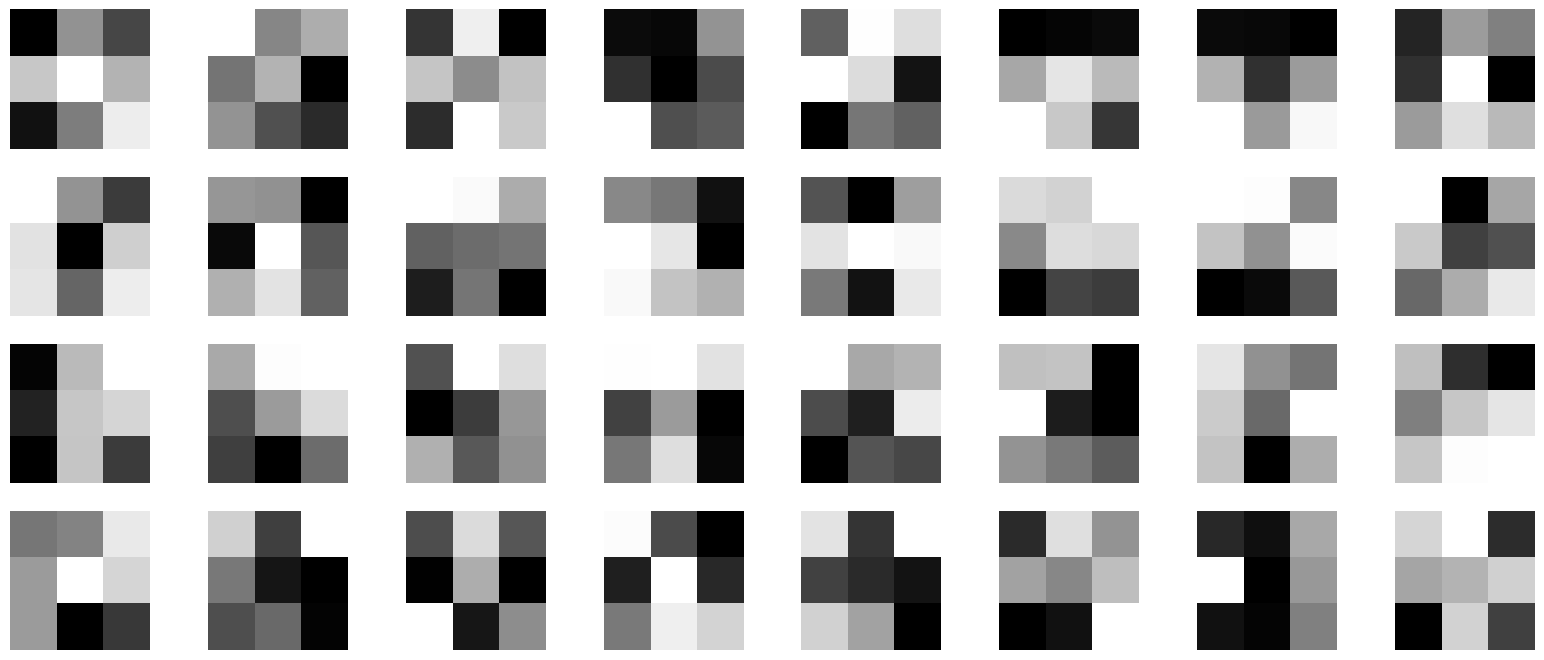

In [14]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
     filter=filter.cpu()
     filter=filter.detach().numpy()
     plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total o
     plt.imshow(filter[0, :, :], cmap='gray')
     plt.axis('off')
 
plt.show()


# Conv-2 layer 
* We created 32 dimension from the original 1 dimension our second convulation layer adds to this and take 32 channel and outputs 32 different channel these are second layer channel and are supposed to be more specific.
* 
Given the size 3X3 for each kernel we can see the image of that size is not big enough for us to visualize what exactly is the model training for but these feature are extracted from the feature which were already highlighted by the 1st layer of convolution.


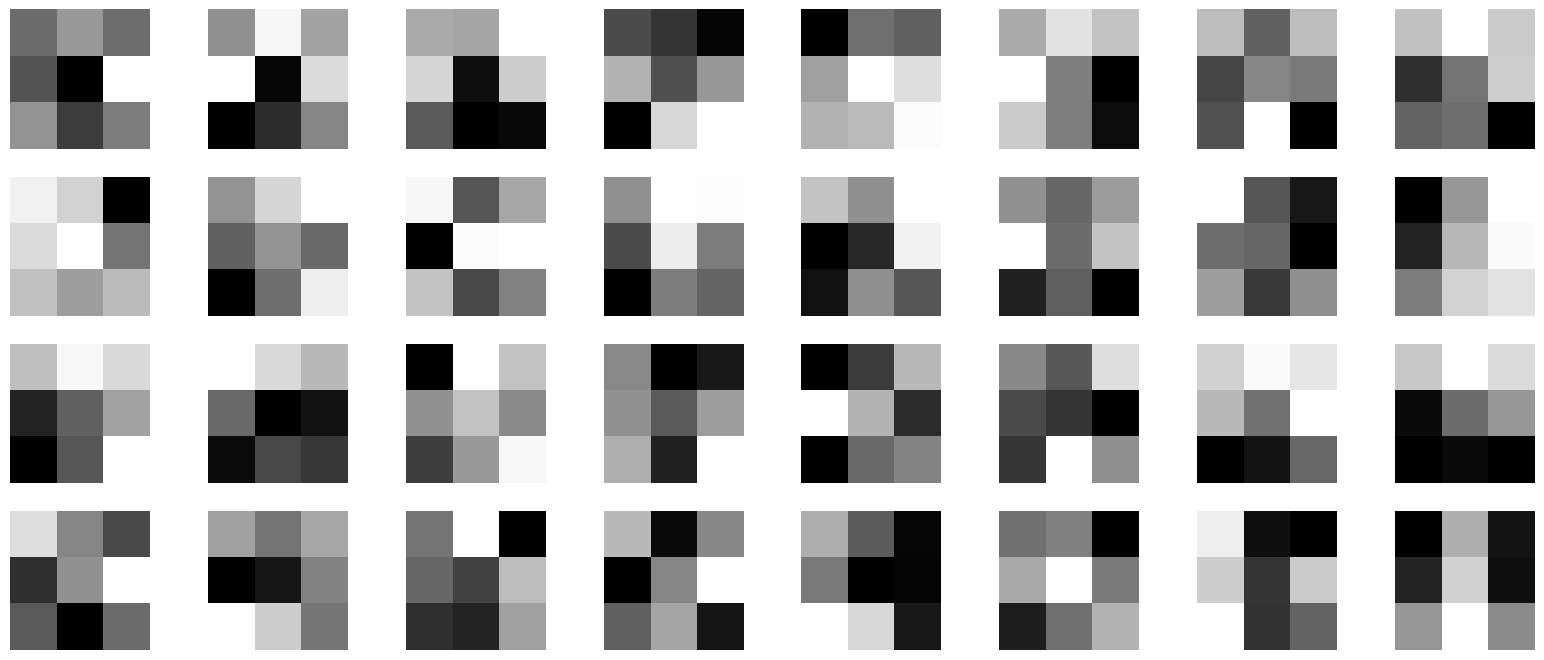

In [15]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[1]):
     filter=filter.cpu()
     filter=filter.detach().numpy()
     plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total o
     plt.imshow(filter[0, :, :], cmap='gray')
     plt.axis('off')
 
plt.show()


# i have choosen the 20th filter for visulization ,totally 32 filters are availble

torch.Size([1, 1, 28, 28])


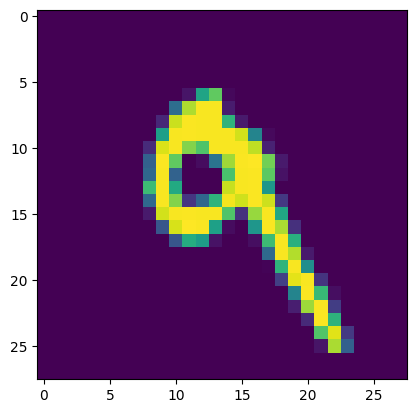

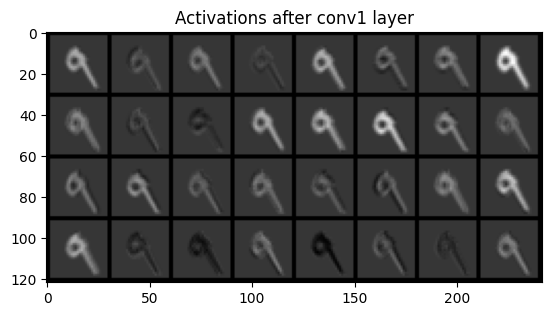

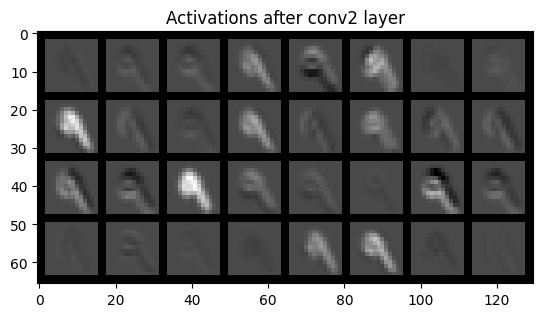

In [16]:
index = 7
test_im = test_loader.dataset.data[[index],:,:].clone()
test_img = test_im.reshape(1,1,28,28).clone().float()
ntest_img=test_img[0].permute(1,2,0)
new_test_img=torch.zeros(28,28)
new_test_img[:,:]=ntest_img[:,:,0]
print(test_img.size())
plt.imshow(new_test_img)
#plt.imshow(test_img[0].permute(1,2,0))
plt.show()
test_img=test_img.to(device)
with torch.no_grad():
         conv1_out = model.conv1.forward(test_img).reshape(32,1,28,28)
         conv1_out = conv1_out.cpu()
         conv1_out = conv1_out - conv1_out.min()
         conv1_out = conv1_out/conv1_out.max()
         vis_conv1 = make_grid(conv1_out)
         plt.imshow(vis_conv1.permute(1,2,0))
         plt.title("Activations after conv1 layer")
         plt.show()
conv2_temp = model.conv1.forward(test_img)
conv2_temp = model.activ.forward(conv2_temp)
conv2_temp = model.pool(conv2_temp)
conv2_out = model.conv2.forward(conv2_temp)
conv2_out = conv2_out.cpu()
conv2_out = conv2_out - conv2_out.min()
conv2_out = conv2_out/conv2_out.max()
conv2_out = conv2_out.reshape(32,1,14,14)
vis_conv2 = make_grid(conv2_out)
plt.imshow(vis_conv2.permute(1,2,0))
plt.title("Activations after conv2 layer")
plt.show()


* After visulizing the above activationmaps in convlayer-1 and convlayer-2 we can conclude that feature maps become sparse when we are going in deeper
* meaning that filter can detect less number of features
* Refer this article https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#9722

## Oculding parts of the image

* by visulizing the below plots and matrix's we can say that learning is meaningful.

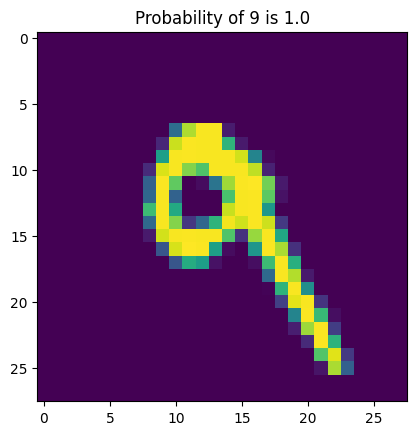

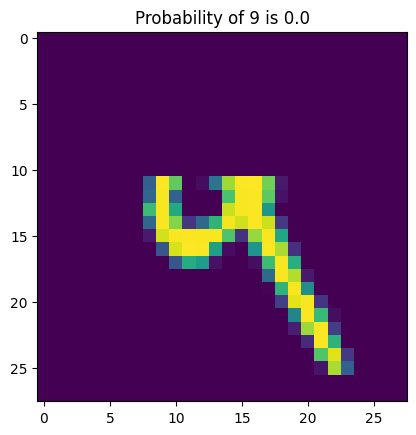

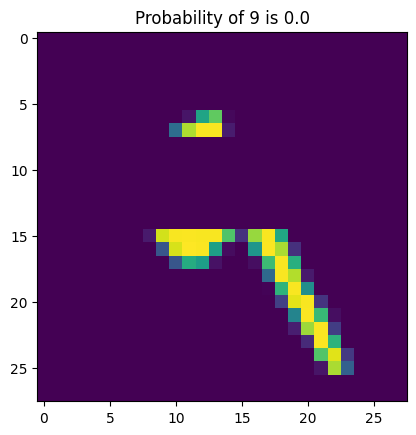

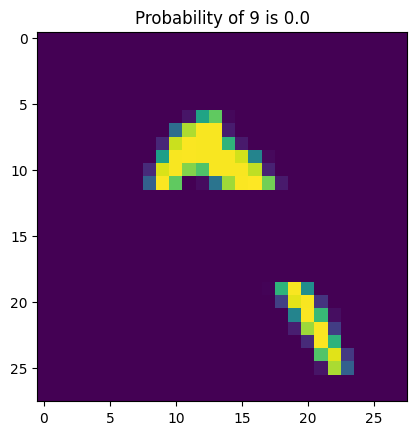

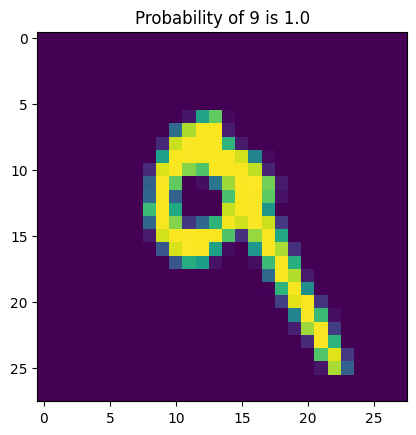

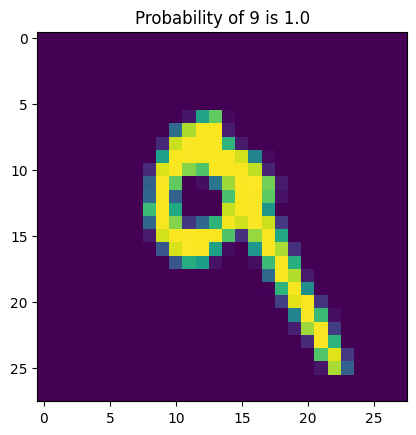

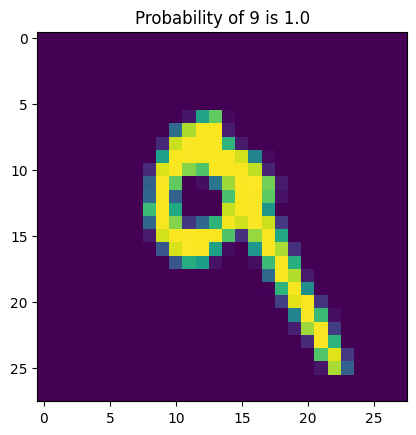

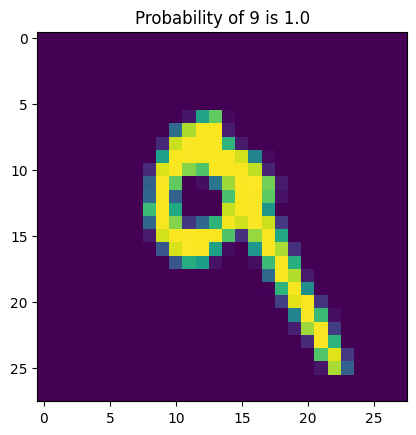

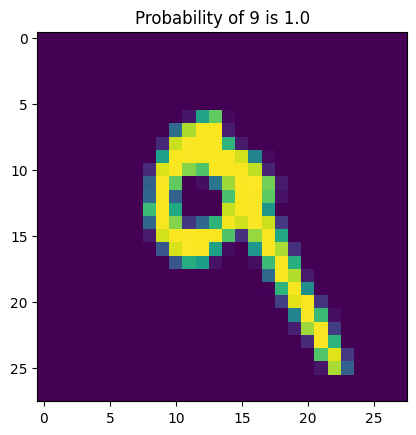

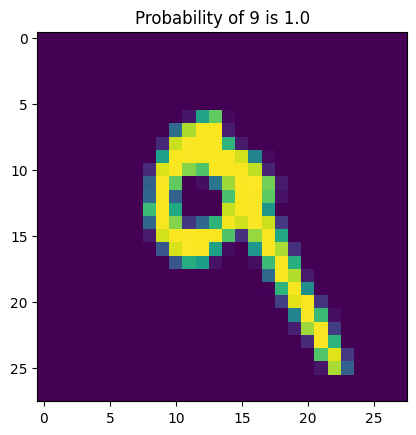

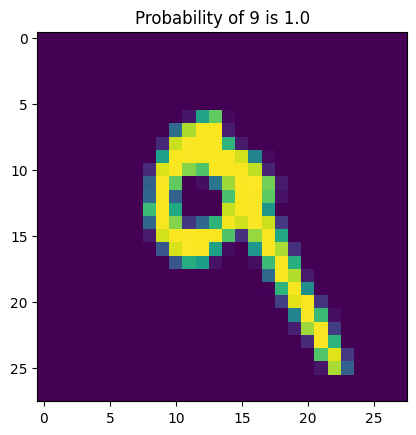

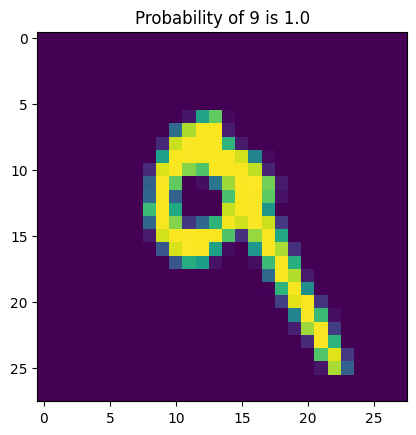

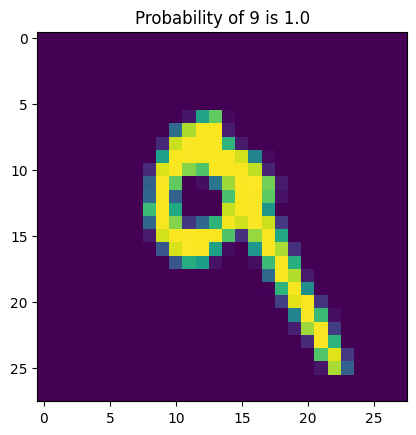

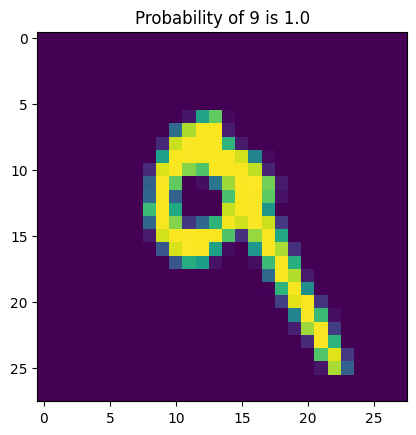

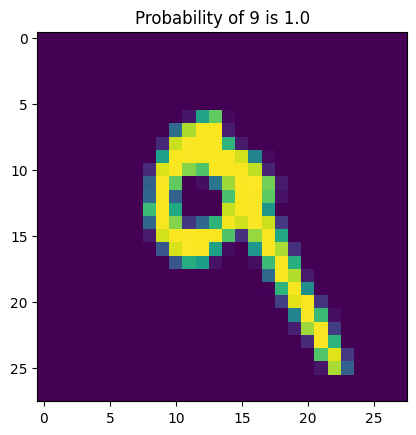

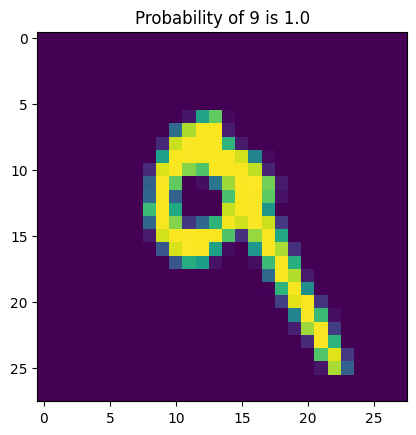

Probability Map for the class 9 as positive as patch is moved is shown below:
[[1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
Maximum Probable Class predicted as the patch is moved is shown below:
[[9. 9. 4. 4. 2. 2. 7.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]]


In [17]:
dim = len(range(0,14,2))
prob_map = np.zeros((dim, dim), dtype = float)
max_prob_class_map = np.zeros_like(prob_map)
for y in range(0,14,2):
    for x in range(0,14,2):
         temp = test_im.clone()
         temp[y:y+7, x:x+7] = 0
         with torch.no_grad():
             temp = temp.clone().reshape(1,1,28,28).float()
             temp=temp.to(device)
         out = model.forward(temp, softmax = False)
         proba = F.softmax(out, dim=1).cpu().detach().numpy()
         pred = np.argmax(proba)
         prob = proba[:, 9]
         max_prob_class = pred
         prob_map[int(y/2), int(x/2)] = prob[0]
         max_prob_class_map[int(y/2), int(x/2)] = max_prob_class
         if ((x%4 == 0) & (y%4 == 0)):
             plt.imshow(temp.cpu().numpy().reshape(28, 28))
             plt.title("Probability of 9 is {}".format(prob[0]))
             plt.show()
print("Probability Map for the class 9 as positive as patch is moved is shown below:")
print(prob_map)
print("Maximum Probable Class predicted as the patch is moved is shown below:")
print(max_prob_class_map)             

        



# 3.Adverserial Examples 



# Non-Targeted Attack 

Adversarial image of number 7: 	 for iteration : 0 	 logit value :[784.7417]
Adversarial image of number 7: 	 for iteration : 500 	 logit value :[1459.5629]
Adversarial image of number 7: 	 for iteration : 1000 	 logit value :[2142.0852]
Adversarial image of number 7: 	 for iteration : 1500 	 logit value :[2825.1833]
Adversarial image of number 7: 	 for iteration : 2000 	 logit value :[3526.4255]
Adversarial image of number 7: 	 for iteration : 2500 	 logit value :[4234.7334]
Adversarial image of number 7: 	 for iteration : 3000 	 logit value :[4913.4365]
Adversarial image of number 7: 	 for iteration : 3500 	 logit value :[5599.727]
Adversarial image of number 7: 	 for iteration : 4000 	 logit value :[6295.851]
Adversarial image of number 7: 	 for iteration : 4500 	 logit value :[6980.4805]
Adversarial image of number 7: 	 for iteration : 5000 	 logit value :[7649.466]
Adversarial image of number 7: 	 for iteration : 5500 	 logit value :[8331.751]
Adversarial image of number 7: 	 for 

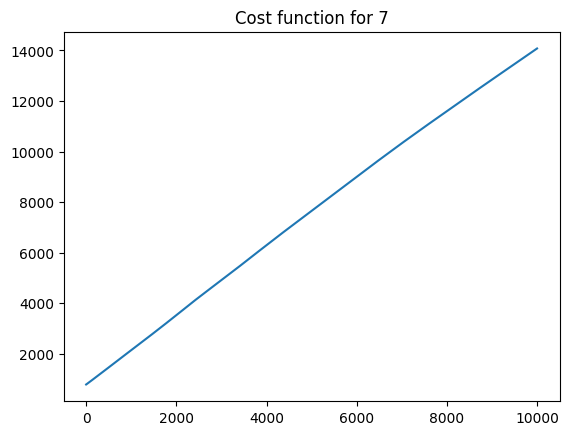

Adversarial image of number: 7 	 for iteration: 9999 	 logit value: [14077.035]


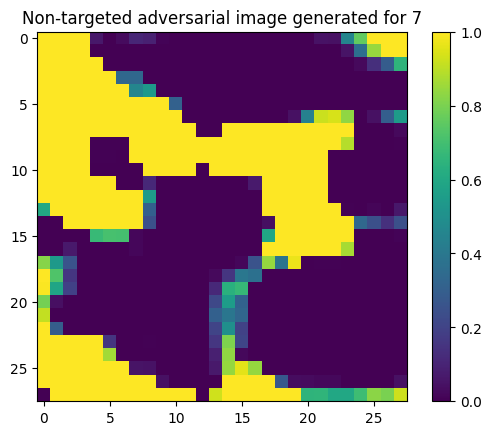

 predicted value by the model is 7.0 


In [18]:
##### Non-Targeted Attack #######
gaussian_noise = torch.normal(128,0,size=(1,1,28,28))
logits = []
for i in range(10000):
         gaussian_noise = torch.autograd.Variable(gaussian_noise, requires_grad = True)
         model=model.cpu()
         out = model.forward(gaussian_noise, softmax = False)
         loss = out[:, 7]
         
         loss_index = loss.cpu().detach().numpy()
         logits.append(loss_index)
         if (i%500 == 0):
             print("Adversarial image of number 7: \t for iteration : {} \t logit value :{}".format(i,loss_index))
         loss.backward(retain_graph=True)
         
         d = torch.sign(gaussian_noise.grad.data)
         gaussian_noise = gaussian_noise + 0.01*d
plt.plot(np.asfarray(logits))
plt.title("Cost function for 7")
plt.show()
print("Adversarial image of number: 7 \t for iteration: {} \t logit value: {}".format(i,loss_index))
noise_kernel = gaussian_noise.cpu().reshape(28, 28).detach().numpy()
noise_kernel = noise_kernel - noise_kernel.min()
noise_kernel = noise_kernel/noise_kernel.max()
plt.imshow(noise_kernel)
plt.colorbar()
plt.title("Non-targeted adversarial image generated for 7")
plt.show()
output=model(gaussian_noise)
print(f" predicted value by the model is {torch.argmax(output).detach().float()} ")


# Reasons
* The generated image does not look any where close to the number 7.
* The possible reason for this could be in a dimmension space of 28 X 28 the model creates a decision boundary based on
the examples it has seen. But there could be many random values within the decision boundary which is also categorised as some number.
* Ref:Mitesh Khapra sir's NPTEL lecture 12.10 https://www.youtube.com/watch?v=zgfcRJYA_kk&list=PLyqSpQzTE6M9gCgajvQbc68Hk_JKGBAYT&index=103


# Targeted Attack, Adding Noise

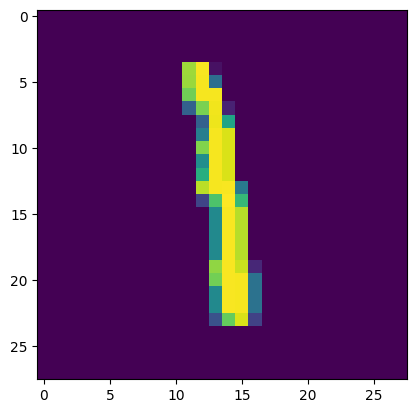

In [19]:
index = 29
target_im = test_loader.dataset.data[[index],:,:].clone()
target_img = target_im.reshape(1,1,28,28).clone().float()
t_img=torch.zeros(28,28)
nt_img=target_img[0].permute(1,2,0)
t_img[:,:]=nt_img[:,:,0]
plt.imshow(t_img)
plt.show()
classify_as = 5


Iteration: 0	 Number: 2	 Classified with probability: [0.]	 MSE: 15874.4404296875

Iteration: 300	 Number: 2	 Classified with probability: [0.]	 MSE: 15917.6787109375

Iteration: 600	 Number: 2	 Classified with probability: [0.]	 MSE: 15942.32421875

Iteration: 900	 Number: 2	 Classified with probability: [0.]	 MSE: 15954.4130859375

Iteration: 1200	 Number: 2	 Classified with probability: [0.]	 MSE: 15984.3505859375

Iteration: 1500	 Number: 2	 Classified with probability: [0.]	 MSE: 16016.2294921875

Iteration: 1800	 Number: 2	 Classified with probability: [7.2851e-41]	 MSE: 16053.2822265625

Iteration: 2100	 Number: 2	 Classified with probability: [1.]	 MSE: 16084.2783203125

Iteration: 2400	 Number: 2	 Classified with probability: [1.]	 MSE: 16124.509765625

Iteration: 2700	 Number: 2	 Classified with probability: [1.]	 MSE: 16182.8193359375

Iteration: 2999	 Number: 2	 Classified with probability: [1.]	 MSE: 16253.537109375



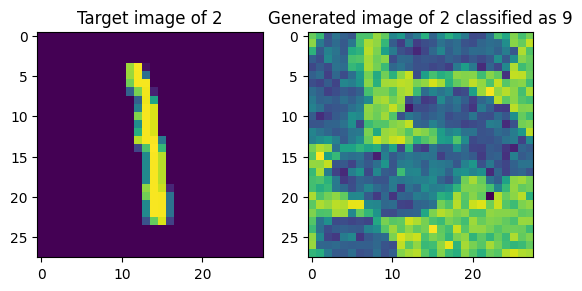

In [20]:
gauss_noise = np.random.normal(loc = 128, scale = 10, size = (28,28))
gaussian_noise = torch.from_numpy(gauss_noise).reshape(1,1,28,28).float()
for i in range(3000):
         gaussian_noise = torch.autograd.Variable(gaussian_noise, requires_grad = True)
         out = model.forward(gaussian_noise, softmax = False)
         probab = F.softmax(out, dim = 1)
         to_be_predicted_prob = probab[:,classify_as].cpu().detach().numpy()
         logit_value = out[:, classify_as]
         mse_error = F.mse_loss(gaussian_noise, target_img)
         mse_error_ = mse_error.cpu().detach().numpy()
         loss = logit_value - 0.001*mse_error
         if (i%300==0):
             print("Iteration: {}\t Number: 2\t Classified with probability: {}\t MSE: {}\n".format(i,to_be_predicted_prob,mse_error))
         loss.backward(retain_graph = True)
         d = torch.sign(gaussian_noise.grad.data)
         gaussian_noise = gaussian_noise + 0.01*d
print("Iteration: {}\t Number: 2\t Classified with probability: {}\t MSE: {}\n".format(i,to_be_predicted_prob,mse_error))
classified_img = gaussian_noise.cpu().reshape(28,28).detach().numpy()
classified_img = classified_img - classified_img.min()
classified_img = classified_img/classified_img.max()
f, ax = plt.subplots(1,2)
ax[0].imshow(target_img.cpu().reshape(28,28).numpy())
ax[0].set_title(f"Target image of 2")
ax[1].imshow(classified_img)
ax[1].set_title(f"Generated image of 2 classified as 9")
plt.show()

